# 미세먼지 데이터 분석

## 1. 데이터 수집

 1. 에어코리아(https://www.airkorea.or.kr/index )에 접속.
 2. 메뉴에서‘통계정보’→ ‘최종확정자료다운로드’ 클릭.

 1. 기상청(https://data.kma.go.kr/cmmn/main.do)에 접속.
 2. 메뉴에서‘데이터’ 클릭.(회원가입필수)

## 2. 데이터 확인

In [227]:
import pandas as pd
import datetime as dt

file_path = "../data/"

air_df = pd.read_excel(file_path + "airdata.xlsx")
display(air_df.head())

weather_df = pd.read_excel(file_path + "weather.xlsx")
display(weather_df.head())

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2025-06-01 01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01 05,0.0035,0.47,0.0188,0.0203,64.0,NaN


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


## 3. 데이터 가공

### 3-1. 데이터 이름 변환

In [228]:
air_df.rename(columns={"날짜":"date","아황산가스":"so2","일산화탄소":"co","오존":"o3","이산화질소":"no2"}, inplace=True)
display(air_df.head())

weather_df.rename(columns={"지점":"center","지점명":"area","일시":"date","기온(°C)":"temperature","풍속(m/s)":"wind_speed","강수량(mm)":"precipitation","습도(%)":"humidity"}, inplace=True)
display(weather_df.head())

,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01 01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01 05,0.0035,0.47,0.0188,0.0203,64.0,NaN


,center,area,date,temperature,wind_speed,precipitation,humidity
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


### 3-2. date 형식으로 변환

In [229]:
# 불필요한 문자 슬라이싱
air_df["date"] = air_df["date"].str[:11]
display(air_df.head())

# date 형식으로 변환
air_df["date"] = pd.to_datetime(air_df["date"])
print(air_df.dtypes)


# 연월일 형식으로 변환
# weather_df["date"] = pd.to_datetime(weather_df["date"].dt.date)
# print(weather_df.dtypes)

display(air_df.head())
display(weather_df.head())

,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN


date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object


,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN


,center,area,date,temperature,wind_speed,precipitation,humidity
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


### 3-3. 데이터 병합

In [230]:
weather_df.drop(columns=["center", "area"], inplace=True)
display(weather_df.head())

,date,temperature,wind_speed,precipitation,humidity
0,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,2025-06-01 05:00:00,18.4,1.0,0.0,75


In [231]:
# 행의 개수가 달라 맞춰주기로 함
display(air_df)
display(weather_df)

air_df = air_df[:-24]
display(air_df)


# date 컬럼이 겹치므로 drop
air_df.drop(columns=["date"], inplace=True)

# 병합
df = air_df.join(weather_df)
df = df[["date", "temperature", "wind_speed", "precipitation", "humidity", "so2", "co", "o3", "no2", "PM10", "PM2.5"]]
display(df)


,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN
...,...,...,...,...,...,...,...
715,2025-06-30,0.0030,0.28,0.0140,0.0092,12.0,4.0
716,2025-06-30,0.0029,0.26,0.0106,0.0107,19.0,11.0
717,2025-06-30,0.0027,0.24,0.0083,0.0102,12.0,7.0
718,2025-06-30,0.0028,0.23,0.0072,0.0081,9.0,5.0


,date,temperature,wind_speed,precipitation,humidity
0,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,2025-06-01 05:00:00,18.4,1.0,0.0,75
...,...,...,...,...,...
691,2025-06-29 20:00:00,29.2,2.9,0.0,61
692,2025-06-29 21:00:00,28.4,2.5,0.0,68
693,2025-06-29 22:00:00,27.7,1.5,0.0,73
694,2025-06-29 23:00:00,27.1,1.8,0.0,76


,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN
...,...,...,...,...,...,...,...
691,2025-06-29,0.0034,0.32,0.0166,0.0069,8.0,2.0
692,2025-06-29,0.0030,0.25,0.0114,0.0100,8.0,2.0
693,2025-06-29,0.0025,0.22,0.0144,0.0092,9.0,5.0
694,2025-06-29,0.0028,0.30,0.0142,0.0133,12.0,4.0


,date,temperature,wind_speed,precipitation,humidity,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01 01:00:00,20.5,0.5,0.0,63,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02:00:00,20.2,1.1,0.0,64,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03:00:00,19.3,2.2,0.0,71,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04:00:00,18.6,0.4,0.0,74,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01 05:00:00,18.4,1.0,0.0,75,0.0035,0.47,0.0188,0.0203,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
691,2025-06-29 20:00:00,29.2,2.9,0.0,61,0.0034,0.32,0.0166,0.0069,8.0,2.0
692,2025-06-29 21:00:00,28.4,2.5,0.0,68,0.0030,0.25,0.0114,0.0100,8.0,2.0
693,2025-06-29 22:00:00,27.7,1.5,0.0,73,0.0025,0.22,0.0144,0.0092,9.0,5.0
694,2025-06-29 23:00:00,27.1,1.8,0.0,76,0.0028,0.30,0.0142,0.0133,12.0,4.0


### 3-3. 결측치 처리

In [232]:
# 결측치 개수 확인
display(df.isna().sum())

date              0
temperature       0
wind_speed        0
precipitation     0
humidity          0
so2               6
co                6
o3                2
no2               6
PM10             23
PM2.5            15
dtype: int64

In [233]:
# method="pad" : 해당 행 바로 위 행의 값으로 채움
df = df.fillna(method="pad")

# 첫 번째 값이 NaN일 경우 아래와 같이 따로 처리해줌
# air_df = air_df.fillna(20, inplace=True)

display(df.isna().sum())
display(df.head())

C:\Users\AI-510-170\AppData\Local\Temp\ipykernel_19100\2275708598.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="pad")


date             0
temperature      0
wind_speed       0
precipitation    0
humidity         0
so2              0
co               0
o3               0
no2              0
PM10             0
PM2.5            0
dtype: int64

,date,temperature,wind_speed,precipitation,humidity,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01 01:00:00,20.5,0.5,0.0,63,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02:00:00,20.2,1.1,0.0,64,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03:00:00,19.3,2.2,0.0,71,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04:00:00,18.6,0.4,0.0,74,0.0032,0.55,0.0174,0.0237,66.0,56.0
4,2025-06-01 05:00:00,18.4,1.0,0.0,75,0.0035,0.47,0.0188,0.0203,64.0,56.0


## 5. 데이터 분석 및 시각화

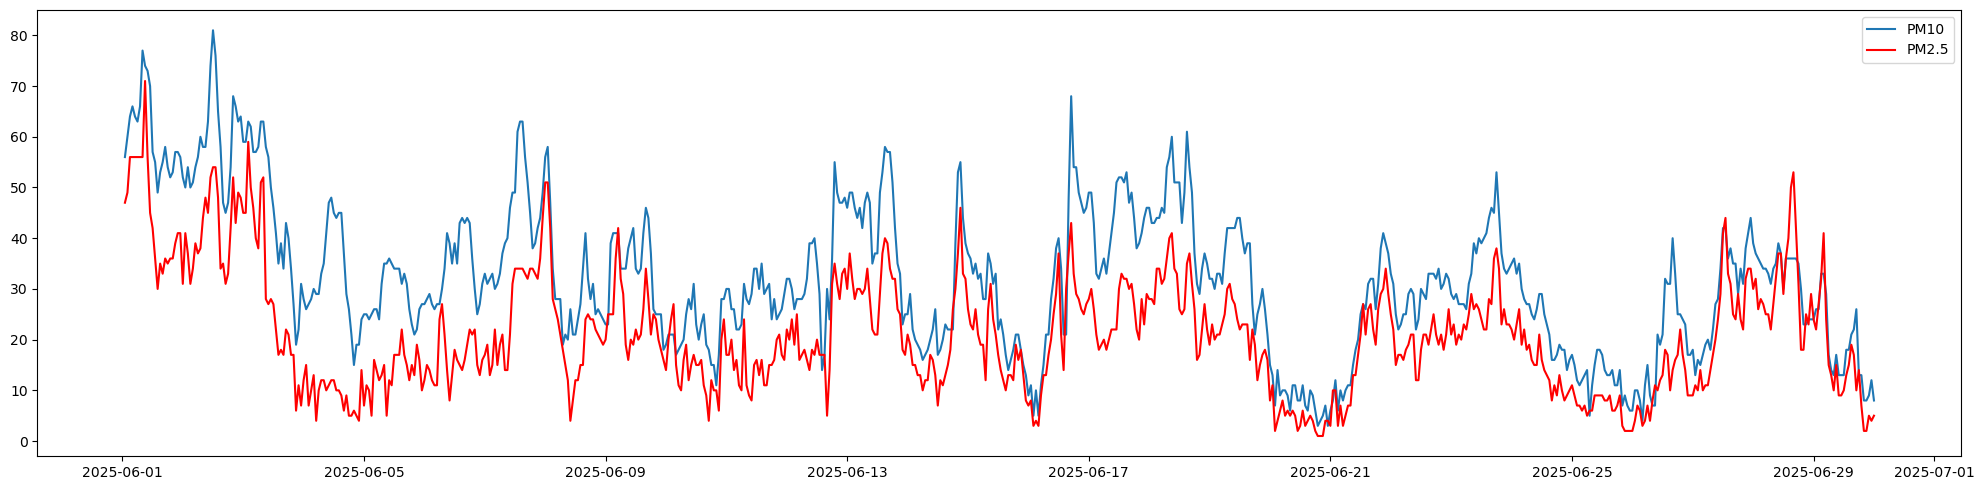

In [238]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df["date"], df["PM10"], label="PM10")
plt.plot(df["date"], df["PM2.5"], color="red", label="PM2.5")
plt.legend()
plt.tight_layout()
plt.show()